# Юдин Артём БВТ2101

In [1]:
# основные библиотеки для глубокого обучения
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# отрисовка графиков
import math as m
from matplotlib import pyplot as plt

Вариант у нас 2:
- Среднее арифметическое двух любых действительных чисел

In [2]:
# создаём целые числа для обучения
x_train = torch.randint(-100000, 100000, (500000, 2)) / 1000

# задаём целевую переменную
y_train = ((x_train[:, 0] + x_train[:, 1]) / 2).unsqueeze(dim=1)

# делаем то же самое для оценки
x_test = torch.randint(-100000, 100000, (500, 2)) / 1000
y_test = (x_test[:, 0] * 0.5 + x_test[:, 1] * 0.5).unsqueeze(dim=1)

In [3]:
print(x_train[:5], "\n", y_train[:5])

tensor([[ 41.0380, -57.3430],
        [  3.8970,  81.7430],
        [ 76.5310,  14.2650],
        [ 17.6380,  99.1400],
        [-16.3120, -24.1270]]) 
 tensor([[ -8.1525],
        [ 42.8200],
        [ 45.3980],
        [ 58.3890],
        [-20.2195]])


Если разложить матричное умножение векторов X и W по элементам и добавить смещение (ещё один обучаемый параметр), то наша задача будет выглядеть как

$$y=x_{1}w_{1} + x_{2}w_{2} + b$$

Нам нужно привести её к виду

$$y = \frac{x_{1}+x_{2}}{2}$$

Становится понятно, что цель обучения модели сводится к 

$$\left\{ \begin{array}{cl}
w_{1} = \frac{1}{2}\\
w_{2} = \frac{1}{2}\\
b=0
\end{array} \right.$$

In [4]:
# 2 нейрона х1 и х2 на вход и один у на выход. Смещение убираем, так как оно нам не нужно
model = nn.Linear(2, 1, bias=False)

# используем Adam
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# используем MSE функцию потерь для задачи регрессии
loss_fn = nn.MSELoss()

# кладём наши данные в специальные классы, которые помогут разбить данные по бачам
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=128)

# повторяем для тестовой выборки
test_dataset = TensorDataset(x_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=128)

Функция backward из предыдущих работ нам больше не будет нужна, так как модель будет сама обучаться. Сделаем только forward

In [5]:
def forward(model, dataloader, optimizer, loss_fn, train=True):
    # переводим модель в нужный режим
    if train:
        model.train()
    else:
        model.eval()

    mse = 0

    for features, y_true in dataloader:
        y_pred = model(features)

        loss = loss_fn(y_pred, y_true)
        mse += loss.item()

        # обучаем
        if train:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    return mse / m.ceil(len(dataloader) / 128)

In [6]:
# инициализируем массив для потерь
train_mse = []
test_mse = []

for epoch in range(5):
    print("epoch", epoch)
    tr_mse = forward(model, train_dataloader, optimizer, loss_fn, True)
    train_mse.append(tr_mse)

    te_mse = forward(model, test_dataloader, None, loss_fn, False)
    test_mse.append(te_mse)

    print(f"Train MSE = {tr_mse}, test MSE = {te_mse}")

epoch 0
Train MSE = 53089.12719945752, test MSE = 3.6951402826446156e-08
epoch 1
Train MSE = 3.160648154712956e-07, test MSE = 7.718507361031968e-10
epoch 2
Train MSE = 5.87309517444974e-09, test MSE = 0.0
epoch 3
Train MSE = 0.0, test MSE = 0.0
epoch 4
Train MSE = 0.0, test MSE = 0.0


In [7]:
model.weight

Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)

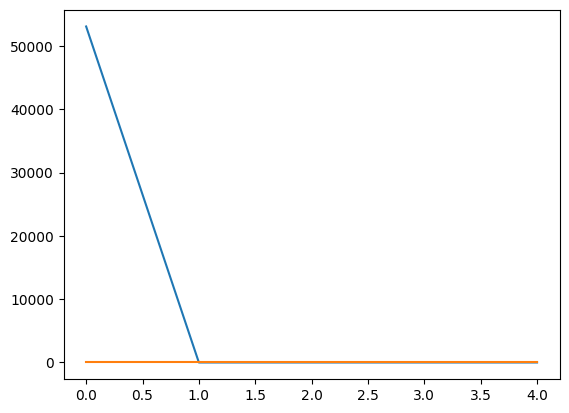

In [8]:
plt.plot(train_mse)
plt.plot(test_mse)

Как мы видим, веса получились идеальными для нашей задачи.

В ходе проделанной работы мы познакомились с фреймворком PyTorch и обучили с его помощью небольшую модель под наш вариант